# Write Functions for EDA

### Generating Wordclouds:

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, figname='wordcloud', colormap='Pastel2', stop_words=[], save=False):
    '''
    Takes a string and plots the x most common words. 
    Set color by changing rgb parameter
    Font path may vary, if error use font_path=None
    
    '''
    font_path = "/Library/Fonts/DIN Condensed Bold.ttf"
    wc = WordCloud(background_color="white",max_words=25,
                   collocations=False, font_path=font_path, scale=5,stopwords=stop_words, colormap=colormap)#, color_func=lambda *args, **kwargs: rgb)
    wc.generate(text)
    
    fig, ax = plt.subplots(figsize=(14,18))
    plt.imshow(wc)
    plt.axis('off')
    plt.tight_layout()
    if save == True:
        plt.savefig('data/wordclouds/{}'.format(figname), dpi=240)


# Text Preprocessing 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np

custom_stop_words =  {'rt','new','demsinphilly','one', 'amp', 'say', 'day', 'us', 'say', 'go', 'com', 'state', 'tweet', 'politics',
 'democrats',
 'political',
 'philly',
 'dnc2016',
 'dncleak'
 'dncinphl',
 'convention',
 'democratic',
 'dnc',
 'demconvention',
 'things',
 'talk',
 'like',
 'national',
 'pennsylvania',
 'speech',
 'live',"n't","'re","'s","doesn't", 'in', 'down', 'you', 's', "weren't", 'before', 'mustn', 'shan', "isn't", 'mightn', 'than', 'aren', 'that', 'from', "that'll", 'wasn', "should've", 'weren', 'do', 'once', 'those', "aren't", 'no', 'hasn', 'himself', 'own', 'shouldn', 'does', 'all', 'your', 'isn', 'm', 'has', 'been', 'these', "hadn't", 'because', 'with', 'having', 'didn', 'up', 'myself', 'between', 'for', 'is', 'at', 'where', 'and', 'be', 'won', 'll', 'or', "mightn't", 'above', 'too', "you'll", "won't", 'he', 'have', 'into', 'of', 'after', 'ma', 'just', "didn't", 'am', 'but', 'couldn', 'the', 'nor', 'being', 'same', 'will', 'theirs', 'while', 'again', 't', 'can', "shan't", 'off', 'any', 'd', 'by', 'our', 'some', 'so', 'themselves', 'what', 'an', 'i', 'only', 'as', 'are', "you're", 'they', 'both', 'them', 'very', 'other', 'a', 'few', "you've", "wasn't", 'yourselves', 'over', "don't", 've', 'against', 'below', 'was', 'my', 'out', 'doing', "needn't", 'did', 'about', "hasn't", 'whom', 'how', 'why', 'further', 'o', 'on', 'not', 'ain', "you'd", 'here', 'y', 'if', "haven't", 'she', 'during', 'we', 'ours', 'through', 'then', 'her', "she's", 'their', 'which', 'don', 'hadn', 'its', 'yours', 'had', 'me', 'his', 'hers', 'when', 're', 'most', 'itself', "it's", 'under', 'now', 'to', 'him', "mustn't", 'yourself', 'should', 'until', 'it', "couldn't", 'who', 'each', "shouldn't", 'there', 'ourselves', 'haven', 'wouldn', 'herself', "wouldn't", 'needn', 'were', 'more', 'this', 'doesn', 'such'}


p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.NUMBER, p.OPT.HASHTAG)

#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)
#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

def clean_tweets(tweet):
    tweet=p.clean(tweet).lower()
    #stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
#after tweepy preprocessing the colon symbol left remain after      #removing mentions
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
#replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
#remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)
#filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in custom_stop_words]
    filtered_tweet = []
#looping through conditions
    for w in word_tokens:
#check tokens against stop words , emoticons and punctuations
        if w not in custom_stop_words and w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)
    #print(word_tokens)
    #print(filtered_sentence)return tweet

In [4]:
df = pd.read_csv('large_data/million-dconvention-tweets.csv')
df.describe()
df.columns

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,reweet_id,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count,user_time_zone
count,605844.000000,6.058440e+05,1.183500e+04,2.267400e+04,605844.000000,3.979540e+05,6.058440e+05,6.058440e+05,605844.000000,605844.000000,6.058440e+05,0.0
mean,1.581366,7.581310e+17,7.574064e+17,2.031245e+16,675.982474,7.578850e+17,4.805048e+04,1.996670e+04,3029.664534,179.781795,8.162149e+04,NaN
std,94.889686,5.540515e+14,1.375731e+16,1.198029e+17,2646.932576,9.714985e+15,8.824933e+04,5.875644e+05,8283.180371,2140.742374,1.490638e+05,NaN
min,0.000000,7.564538e+17,2.300152e+17,1.200000e+01,0.000000,2.029270e+10,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,NaN
25%,0.000000,7.577582e+17,7.576346e+17,1.580876e+07,0.000000,7.577482e+17,2.840000e+03,2.980000e+02,401.000000,8.000000,8.897000e+03,NaN
50%,0.000000,7.581095e+17,7.579589e+17,4.969813e+07,15.000000,7.580881e+17,1.493600e+04,1.000000e+03,1086.000000,31.000000,3.083900e+04,NaN
75%,0.000000,7.585271e+17,7.583853e+17,4.993367e+08,219.000000,7.584708e+17,5.309550e+04,3.178000e+03,3083.000000,95.000000,9.224900e+04,NaN
max,41455.000000,7.594183e+17,7.594173e+17,7.591460e+17,27313.000000,7.594181e+17,2.393502e+06,1.085449e+08,576443.000000,209263.000000,3.515706e+06,NaN


Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'reweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

In [5]:
#clean text column
df['text'] = df['text'].apply(lambda x: clean_tweets(x))

In [6]:
#clean description column
df['user_description'].fillna(value='', inplace=True)
df['user_description'] = df['user_description'].apply(lambda x: clean_tweets(x))

In [7]:
#clean user location column
df['user_location'].fillna(value='', inplace=True)
df['user_location'] = df['user_location'].apply(lambda x: clean_tweets(x))

In [8]:
#save the cleaned text df
df.to_csv('/Users/jacobmullins/data-science-immersive/capstone_2-3/large_data/million_df.csv')

# Create User Summary DataFrame for Clustering Users
Group by users and combine their text and hashtag features (respectively)

In [32]:
df = pd.read_csv('large_data/million_df.csv', index_col=0)
df['user_description'].fillna('', inplace=True)
#are any screen names missing? if not, use these as the global key/index
df['user_screen_name'].isna().nunique()
#all screen names are present. some are floats though? (from error below)
#ensure that all usernames are strings
df['user_screen_name'] = df['user_screen_name'].astype('str')
df['user_screen_name'].dtypes

dtype('O')

In [33]:
features = ['user_location',
       'favorite_count', 
        'retweet_count', 
       'text', 
       'user_screen_name', 'user_description',
       'user_followers_count', 
       'user_name']


final_df = df[features]
final_df = final_df[final_df['text'].isna()==False]
final_df['user_location'].fillna(value='', inplace=True)
final_df['user_location']
# add the user_location text to the user_description text
final_df['user_description'] = final_df['user_description'] + final_df['user_location'] 

In [34]:
#group by username and select only the text columns
combined_text = final_df.groupby(['user_screen_name']).apply(lambda x: ' '.join(x['text']))
combined_text.rename('combined_text',inplace=True)
final_df = final_df.merge(combined_text, left_on='user_screen_name',right_index=True)
#new df for user summaries
user_summary = final_df.groupby(['user_screen_name', 'user_description', 'combined_text', 'user_location']).mean() 
user_summary.reset_index(inplace=True)
user_summary

,user_screen_name,user_description,combined_text,user_location,favorite_count,retweet_count,user_followers_count
0,000120o,italia-roma,meryl streep celebrated breaking glass ceiling...,italia-roma,0.0,19.00,3447.0
1,0001Angel,liberal,sanders `` hillary clinton must become next pr...,,0.0,166.00,639.0
2,000Dillon000,independent christian conservative army vet ar...,muslim talking trump disrespecting women read ...,,0.0,179.50,4181.0
3,0014Priya,screenwriter yogini movie art book music natur...,latest screenwriting tvseries movies thanks,netherlands,0.0,0.00,524.0
4,001Leslie,always love dad,wow .. moving touching,,0.0,0.00,162.0
...,...,...,...,...,...,...,...
246953,zzzdeprived,ohio,amazing job ca wait see win `` america great a...,ohio,0.0,55.50,158.0
246954,zzzdogman,deplorable dreg cagey old vet- reagan trump ma...,bernie taught anything loves money especially ...,colorado,0.0,289.50,11748.5
246955,zzzpills,lover mother earth bernie sandersaustin tx,subway filled sandernistas never miss opportun...,austin tx,0.0,273.75,357.0
246956,zzzzalex,,mostly false,,0.0,453.00,10.0


In [35]:
user_summary.combined_text.apply(lambda x: len(x)).mean()
# the average combined text length is 128 chars (standard length of a tweet)

109.18429449542027

In [36]:
# how many users are missing descriptions? 38,602
user_summary[user_summary['user_description']=='']

,user_screen_name,user_description,combined_text,user_location,favorite_count,retweet_count,user_followers_count
23,00TBliVAaRAtRFL,,bill clinton hillary `` never made fun people ...,,0.0,244.0,650.0
27,00jughead15,,bernie sanders moves nominate hillary clinton ...,,0.0,1301.0,82.0
35,01EddyCordero,,scrapped chair wo preside party committee chai...,,0.0,0.0,596.0
36,01Grokxsys,,percent unwavering sanders supporters plan vot...,,0.0,1.5,27.0
45,01judith01,,seriously,,0.0,0.0,407.0
...,...,...,...,...,...,...,...
246936,zyali2020,,`` nominated `` brilliant working already,,0.0,2.5,157.0
246937,zyazss,,'m saying boo michelle obama tonight gon fight,,0.0,1698.0,127.0
246940,zyxwwutsr,,never late- depart disastrous join https,,0.0,1593.0,113.0
246948,zzxcv000,,`` '',,0.0,1005.0,13.0


# Vectorize Tweet Text
(using Gensim + GloVe)

In [37]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import gensim.downloader as api
import gensim
from gensim.models.word2vec import Word2Vec

In [42]:
#start with the glove-25 and increase if needed (50, 100, 200 available)
glove_25 = api.load('glove-twitter-25')
glove_100 = api.load('glove-twitter-200')

2020-06-09 09:52:01,144 : INFO : loading projection weights from /Users/jacobmullins/gensim-data/glove-twitter-25/glove-twitter-25.gz
2020-06-09 09:53:13,156 : INFO : loaded (1193514, 25) matrix from /Users/jacobmullins/gensim-data/glove-twitter-25/glove-twitter-25.gz


[=================================================-] 99.7% 756.0/758.5MB downloaded


2020-06-09 10:00:19,852 : INFO : glove-twitter-200 downloaded
2020-06-09 10:00:19,863 : INFO : loading projection weights from /Users/jacobmullins/gensim-data/glove-twitter-200/glove-twitter-200.gz
2020-06-09 10:07:33,829 : INFO : loaded (1193514, 200) matrix from /Users/jacobmullins/gensim-data/glove-twitter-200/glove-twitter-200.gz


In [39]:
# take a look at the vocabulary
for i, word in enumerate(glove_25.vocab):
    if i == 20:
        break
    #print(word)

# try to vectorize a word
#sample_text = user_summary['combined_text'][0].split()
#sample_text
#glove_25.word_vec(sample_text[0])

# test again with sentences
sentences = user_summary['combined_text']
#print(sentences)


#write a function to loop through tweets and vectorize each word
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

X = []
for sentence in sentences:
    X.append(sent_vectorizer(sentence, glove_25))

In [40]:
#verify that the number of vectors equals the number of tweets
len(X)
user_summary.shape

(246958, 7)

# Cluster Users

In [41]:
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
from sklearn import cluster
from sklearn import metrics

model = glove_25
sentences = user_summary['combined_text']

NUM_CLUSTERS=10

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS).fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)

#TSNE

ValueError: setting an array element with a sequence.

In [ ]:
kmeans.get_params

In [ ]:
#join cluster labels on the user_summary dataframe


In [ ]:
#compare clusters to communities

# Create User Summaries for Labeled Community Data + TF-IDF Model

#### 1.) Load df with processed text and descriptions

In [8]:
import pandas as pd

df = pd.read_csv('large_data/million_df.csv', index_col=0)
#fill NaN text fields with blank text
df['text'].fillna('', inplace=True)
df['user_description'].fillna('', inplace=True)
#df['hashtags'].fillna('', inplace=True)
df['user_location'].fillna('', inplace=True)
#make sure all rows are str type
df['text'] = df['text'].astype('str')
df['user_description'] = df['user_description'].astype('str')
#df['hashtags'] = df['hashtags'].astype('str')
df['user_location'] = df['user_location'].astype('str')
df['user_screen_name'] = df['user_screen_name'].astype('str')
# nodes = 
# edges = 
# tweets = 605,000
# total users =
df.columns

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'reweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name.1',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

#### 2.) Load labeled community df

In [9]:
#open labeled community nodes
community_df = pd.read_csv('large_data/million_nodes.csv', index_col='Id')
#take only the basic features for now
community_df[['Label','modularity_class']]

/Users/jacobmullins/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Label,modularity_class
Id,,
7874982,lauraleishman,0
18464266,peterdaou,13
25493304,zachhaller,2
539666970,NewsNeck,8
106182754,Richard_Schiff,13
...,...,...
241010173,NaN,2
159538373,NaN,13
236966874,NaN,68


#### 3.) Merge community labels onto tweet df

In [10]:
labeled_df = df.merge(community_df, left_on='user_screen_name', right_on='Label', how='outer')
# how many labeled tweets do we have? ~495,000
labeled_df['modularity_class'].dropna()

1             1.0
3            13.0
4            13.0
5            13.0
6            13.0
           ...   
930911      613.0
930912    11203.0
930913       13.0
930914       12.0
930915       30.0
Name: modularity_class, Length: 495026, dtype: float64

In [11]:
#filter out all those rows that don't have an assigned modularity class. Keep unlabeled ones for later use.
unlabeled_df = labeled_df[labeled_df['modularity_class'].isna() == True]
labeled_df = labeled_df[labeled_df['modularity_class'].isna() == False]

In [12]:
#drop the unneeded columns
features = [
        'id', 'user_location',
       'favorite_count', 
        'retweet_count', 
       'text', 
       'user_screen_name', 'user_description',
       'user_followers_count', 
       'user_name', 
       'modularity_class']
labeled_df = labeled_df[features]
#rename community column
labeled_df.rename(columns={'modularity_class':'community'},inplace=True)

In [13]:
#drop the users with no username
labeled_df = labeled_df[labeled_df['user_screen_name'].isna() == False]
labeled_df['user_screen_name'] = labeled_df['user_screen_name'].astype('str')

In [14]:
# group by username and combine their tweet text, hashtags
combined_text = labeled_df.groupby('user_screen_name').apply(lambda x: ' '.join(x['text']))
combined_text.rename('combined_text', inplace=True)

labeled_df = labeled_df.merge(combined_text, left_on='user_screen_name', right_index=True)

user_summary = labeled_df.groupby(['user_screen_name', 'user_location','user_description', 'combined_text', 'community']).mean()
user_summary.drop(columns=['id'], inplace=True)
user_summary.reset_index(inplace=True)

#### 4.) Break top 17 communities into separate df and explore data

In [15]:
# select the users that belong to one of the largest 17 communities. Smallest community = 1% of all users. 
top_communities = [30.0, 13.0, 2.0, 6.0, 8.0, 61.0, 58.0, 68.0, 127.0, 12.0, 70.0, 1029.0, 62.0, 50.0, 273.0, 4382.0, 32.0]

#user_summary = user_summary[user_summary['community'] in top_communities]
user_summary = user_summary[user_summary['community'].apply(lambda x: x in top_communities)]
user_summary

#for label in top_communities:
#    users = user_summary[user_summary['community'] == label].copy()
#    print('Community Label = {}'.format(label))
#    plot_wordcloud((' '.join(users['combined_text'])), save=False, stop_words=['demconvention', 'democratic', 'debate', 'dncinphl', 'convention', 'tonight', 'vote'])

for label in top_communities:
    print('{}:'.format(label), user_summary[user_summary['community'] == float(label)].shape[0])

#for label in top_communities:
#    users = user_summary[user_summary['community'] == label].copy()
#    plot_wordcloud((' '.join(users['user_description'])), save=False, stop_words=['demconvention', 'democratic', 'debate', 'dncinphl', 'convention', 'tonight', 'vote'])


30.0: 6082
13.0: 7483
2.0: 4266
6.0: 1082
8.0: 947
61.0: 982
58.0: 1104
68.0: 896
127.0: 595
12.0: 550
70.0: 332
1029.0: 50
62.0: 300
50.0: 463
273.0: 612
4382.0: 156
32.0: 399


#### 5.) Vectorize / TFIDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

vectorizer = TfidfVectorizer()


X = user_summary['user_description'] + user_summary['combined_text']
y = user_summary['community']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [18]:
# Plot top tf-idf features
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Olivier Grisel <olivier.grisel@ensta.org>
#         Mathieu Blondel <mathieu@mblondel.org>
#         Lars Buitinck
# License: BSD 3 clause

def top_tfidf_feats(row, features, top_n=10):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=10):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

feature_names=vectorizer.get_feature_names()
top_feats_in_doc(X_train,feature_names,1)

,feature,tfidf
0,richards,0.183556
1,reminder,0.170193
2,deal,0.142302
3,courageo,0.139988
4,medicaregoing,0.139988
5,trump,0.138658
6,swallowing,0.134421
7,prose,0.127408
8,reassuring,0.127408
9,love,0.125593


In [19]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs
dfs=top_feats_by_class(X_train,y_train,feature_names, top_n=10)

In [20]:
len(dfs)

17

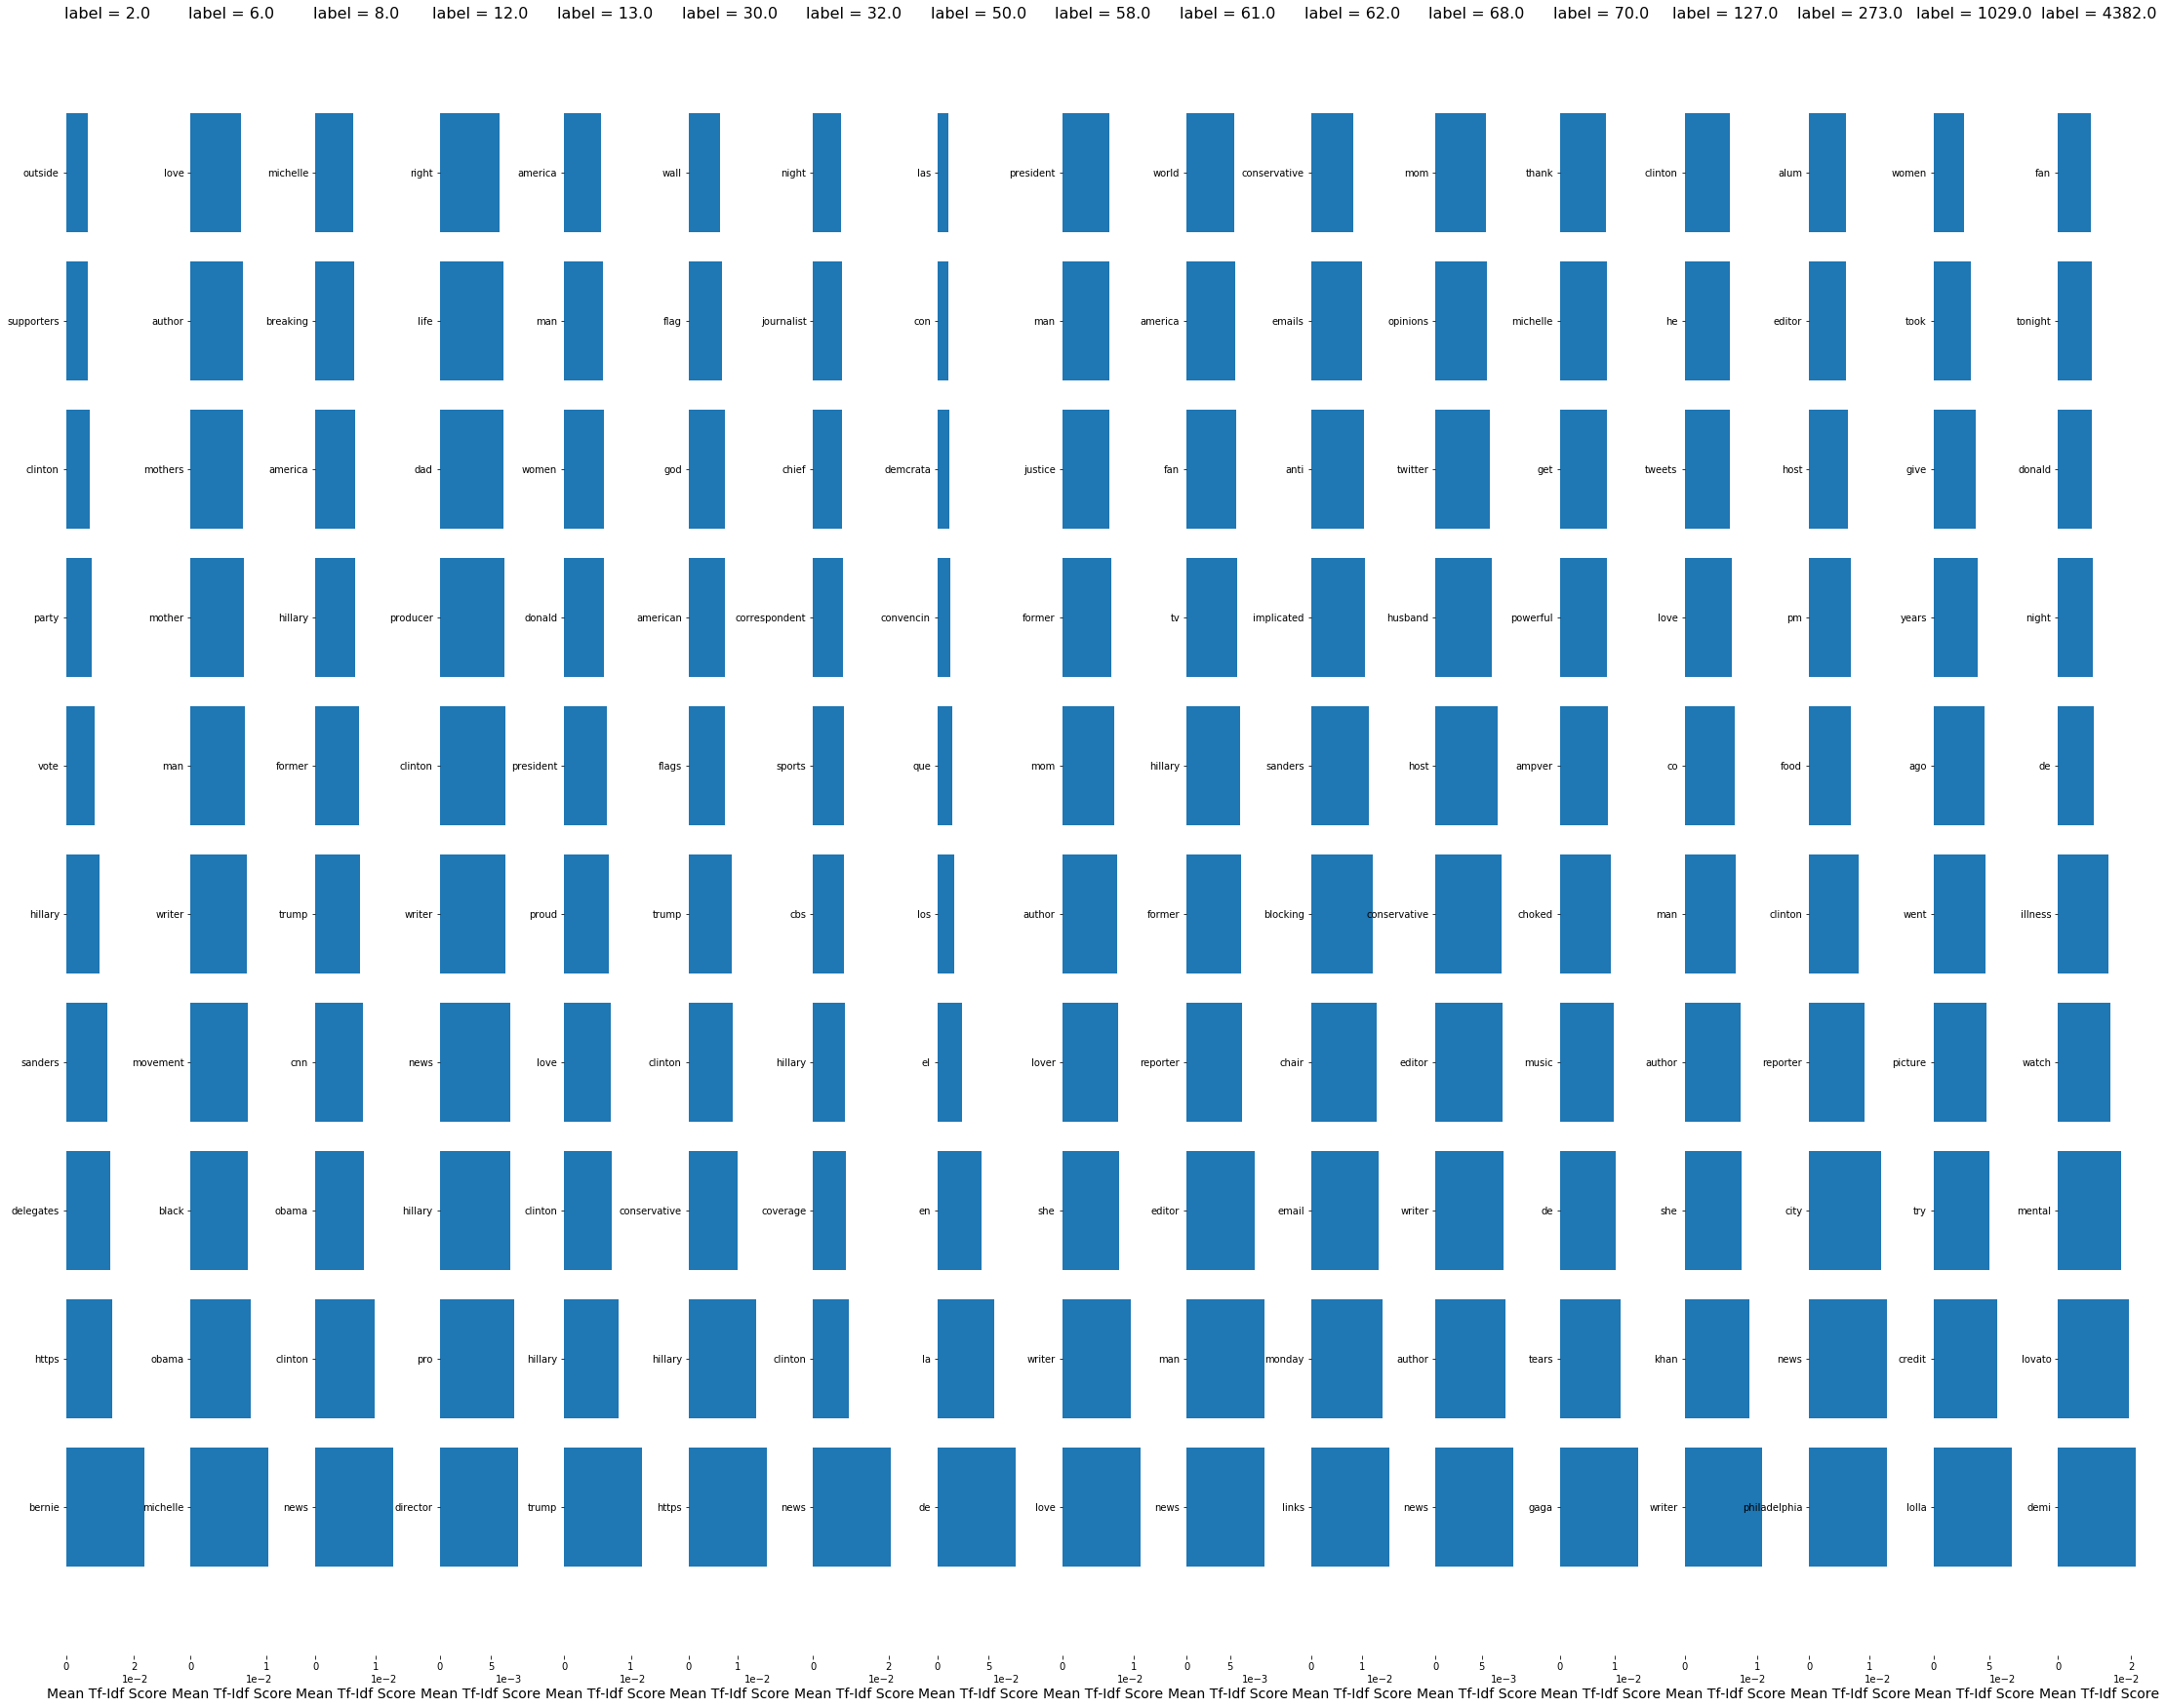

<Figure size 432x288 with 0 Axes>

In [21]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(36, 27), facecolor="w",)
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.set_cmap('viridis')    
    plt.show()
    plt.set_cmap('viridis')

plot_tfidf_classfeats_h(dfs)
plt.savefig('data/democrat/17_class_tfidf.png', dpi=240)

# Repeat TFIDF for just user description text

# Benchmark Models

In [29]:
target_names = y.unique().astype('str')
target_names

array(['2.0', '30.0', '127.0', '58.0', '13.0', '6.0', '61.0', '70.0',
       '8.0', '273.0', '50.0', '12.0', '68.0', '62.0', '4382.0', '32.0',
       '1029.0'], dtype='<U32')

In [30]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Olivier Grisel <olivier.grisel@ensta.org>
#         Mathieu Blondel <mathieu@mblondel.org>
#         Lars Buitinck
# License: BSD 3 clause
import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics


def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))


        print("classification report:")
        print(metrics.classification_report(y_test, pred,
                                            target_names=target_names))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="auto"), "Ridge Classifier"),
        (Perceptron(max_iter=50), "Perceptron"),
        (PassiveAggressiveClassifier(max_iter=50),
         "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))
results.append(benchmark(ComplementNB(alpha=.1)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
  ('classification', LinearSVC(penalty="l2"))])))

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.01)
train time: 1.812s
test time:  0.009s
accuracy:   0.522
dimensionality: 58077
density: 1.000000
classification report:
              precision    recall  f1-score   support

         2.0       0.55      0.61      0.58      1067
        30.0       0.26      0.07      0.11       270
       127.0       0.23      0.05      0.09       237
        58.0       0.00      0.00      0.00       137
        13.0       0.48      0.79      0.60      1871
         6.0       0.62      0.78      0.69      1521
        61.0       0.43      0.03      0.06       100
        70.0       0.35      0.20      0.25       116
         8.0       0.27      0.06      0.10       276
       273.0       0.15      0.03      0.05 

/Users/jacobmullins/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train time: 2.057s
test time:  0.012s
accuracy:   0.506
dimensionality: 58077
density: 0.029862
classification report:
              precision    recall  f1-score   support

         2.0       0.54      0.62      0.58      1067
        30.0       0.16      0.04      0.06       270
       127.0       0.12      0.02      0.04       237
        58.0       0.08      0.01      0.01       137
        13.0       0.49      0.75      0.59      1871
         6.0       0.61      0.79      0.69      1521
        61.0       0.00      0.00      0.00       100
        70.0       0.34      0.22      0.26       116
         8.0       0.06      0.01      0.02       276
       273.0       0.09      0.01      0.01       245
        50.0       0.11      0.01      0.02        75
        12.0       0.25      0.03      0.05       224
        68.0       0.09      0.04      0.05        83
        62.0       0.30      0.02      0.04       149
      4382.0       0.37      0.12      0.19       153
        32.0    

/Users/jacobmullins/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         2.0       0.74      0.46      0.57      1067
        30.0       0.11      0.21      0.14       270
       127.0       0.11      0.15      0.13       237
        58.0       0.03      0.04      0.03       137
        13.0       0.56      0.51      0.54      1871
         6.0       0.80      0.60      0.69      1521
        61.0       0.17      0.09      0.12       100
        70.0       0.38      0.27      0.31       116
         8.0       0.10      0.17      0.13       276
       273.0       0.09      0.16      0.12       245
        50.0       0.08      0.09      0.08        75
        12.0       0.09      0.13      0.10       224
        68.0       0.06      0.13      0.08        83
        62.0       0.12      0.11      0.11       149
      4382.0       0.11      0.18      0.14       153
        32.0       0.25      0.08      0.12        12
      1029.0       0.00      0.00      0.00        39

    accuracy              

In [ ]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

# Citations
GloVe - Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation. [pdf] [bib]

Word2Vec - Mikolov, Tomas; et al. (2013). "Efficient Estimation of Word Representations in Vector Space"

K-means code adapted from a former galvanize student's capstone https://github.com/walker777007/A-Deep-Dive-into-Reddit-Comments

TF-IDF Plots: https://github.com/GalvanizeDataScience/lectures/blob/NYC/nlp/plot_document_classification_20newsgroups_v3.ipynb